In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [14]:
# Load the dataset
url = 'House.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0      4313   9005     956               0   

In [13]:
data.shape

(10000, 17)

In [10]:
# Data Exploration
# Display basic statistics of the dataset
print("Basic statistics of the dataset:")
print(data.describe())

Basic statistics of the dataset:
       squareMeters  numberOfRooms       hasYard       hasPool        floors  \
count   10000.00000   10000.000000  10000.000000  10000.000000  10000.000000   
mean    49870.13120      50.358400      0.508700      0.496800     50.276300   
std     28774.37535      28.816696      0.499949      0.500015     28.889171   
min        89.00000       1.000000      0.000000      0.000000      1.000000   
25%     25098.50000      25.000000      0.000000      0.000000     25.000000   
50%     50105.50000      50.000000      1.000000      0.000000     50.000000   
75%     74609.75000      75.000000      1.000000      1.000000     76.000000   
max     99999.00000     100.000000      1.000000      1.000000    100.000000   

           cityCode  cityPartRange  numPrevOwners         made    isNewBuilt  \
count  10000.000000   10000.000000   10000.000000  10000.00000  10000.000000   
mean   50225.486100       5.510100       5.521700   2005.48850      0.499100   
std   

In [11]:
# Display information about the dataset (e.g., data types, missing values)
print("\nInformation about the dataset:")
print(data.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int6

In [12]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())



Missing values in the dataset:
squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64


In [15]:
data.columns.values.tolist()

['squareMeters',
 'numberOfRooms',
 'hasYard',
 'hasPool',
 'floors',
 'cityCode',
 'cityPartRange',
 'numPrevOwners',
 'made',
 'isNewBuilt',
 'hasStormProtector',
 'basement',
 'attic',
 'garage',
 'hasStorageRoom',
 'hasGuestRoom',
 'price']

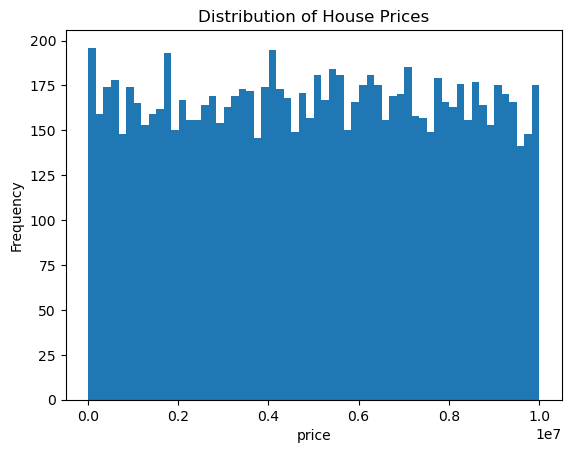

In [17]:
# Visualize the data (example: histogram of house prices)
plt.hist(data['price'], bins=60,)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

In [21]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
X_train=data[['squareMeters','numberOfRooms','hasYard','hasPool','floors','cityCode','cityPartRange','numPrevOwners','made','isNewBuilt','hasStormProtector','basement','attic','garage','hasStorageRoom',
'hasGuestRoom']]
y_train=data['price']
model.fit(X_train,y_train)
feature_importances = model.feature_importances_
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

squareMeters: 0.9999989630024089
numberOfRooms: 9.64079153063466e-08
hasYard: 3.064344562023473e-08
hasPool: 3.1598147959524574e-08
floors: 1.354354720481972e-07
cityCode: 9.854175077858517e-08
cityPartRange: 6.403650890977323e-08
numPrevOwners: 6.921556235321282e-08
made: 8.720694018162323e-08
isNewBuilt: 2.0450905539648008e-08
hasStormProtector: 1.764648173799927e-08
basement: 9.514050307977345e-08
attic: 1.0894907191139282e-07
garage: 9.245700312059436e-08
hasStorageRoom: 2.0664231526070074e-08
hasGuestRoom: 6.860365100546985e-08


In [23]:
# Calculate correlation matrix
corr_matrix = data.corr()

In [50]:
correlation_matrix=data.corr()
# Look at the correlations with the 'Price' column
feature_coorelation=correlation_matrix["price"].sort_values(ascending=False)
print (feature_coorelation)

price                1.000000
squareMeters         0.999999
numPrevOwners        0.016619
numberOfRooms        0.009591
cityPartRange        0.008813
hasStormProtector    0.007496
ageOfProperty        0.007210
floors               0.001654
attic               -0.000600
hasGuestRoom        -0.000644
cityCode            -0.001539
hasStorageRoom      -0.003485
basement            -0.003967
hasPool             -0.005070
hasYard             -0.006119
made                -0.007210
isNewBuilt          -0.010643
garage              -0.017229
Name: price, dtype: float64


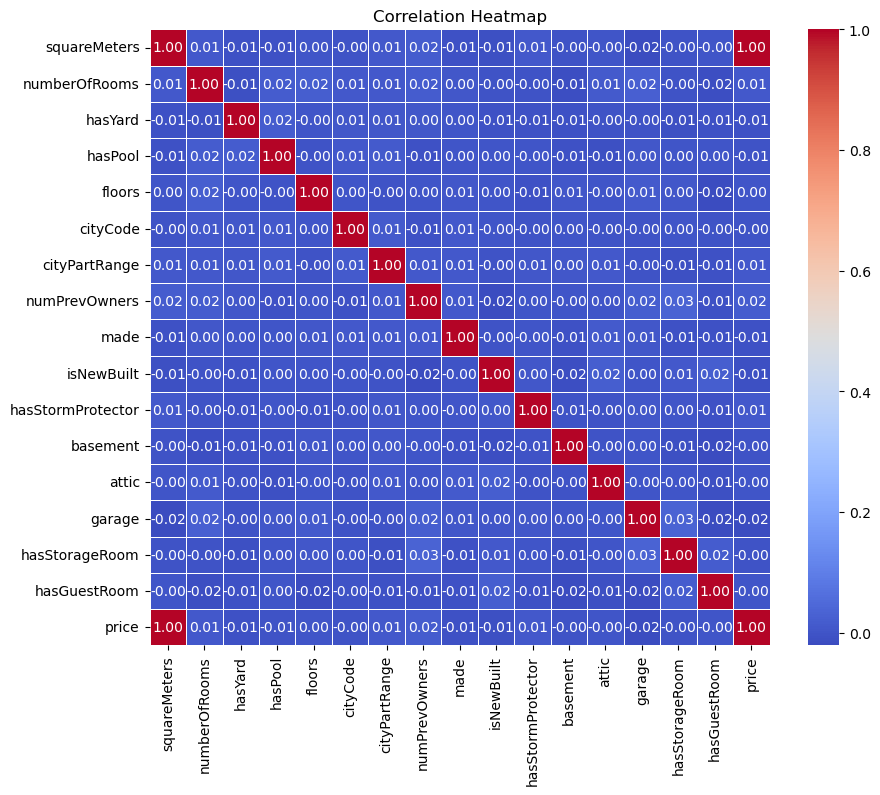

In [24]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [25]:
# Select features with high correlation with target variable 'price'
high_corr_features = corr_matrix['price'].sort_values(ascending=False).index[1:]  # Exclude 'price' itself
print("Features with high correlation with 'price':")
print(high_corr_features)

Features with high correlation with 'price':
Index(['squareMeters', 'numPrevOwners', 'numberOfRooms', 'cityPartRange',
       'hasStormProtector', 'floors', 'attic', 'hasGuestRoom', 'cityCode',
       'hasStorageRoom', 'basement', 'hasPool', 'hasYard', 'made',
       'isNewBuilt', 'garage'],
      dtype='object')


<Axes: xlabel='price', ylabel='squareMeters'>

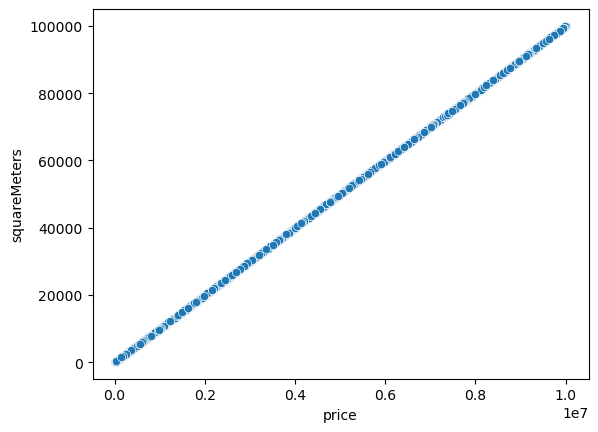

In [35]:
# we found a strong correlation between the price and the squareMeters features 
sns.scatterplot(data,x="price",y="squareMeters")

In [52]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['price'])  
y = data['price']

#Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [53]:
from sklearn.linear_model import LinearRegression
# Create a Linear Regression model
model = LinearRegression()
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [54]:
# Perform feature selection
X_selected = data[selected_features]
y_selected = data['price']

In [55]:
# Feature Engineering

from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree of polynomial features
X_poly = poly.fit_transform(X_selected)


In [56]:
import datetime
current_year=datetime.datetime.now().year
data['ageOfProperty']=current_year - data['made']
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,ageOfProperty
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,19
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,9
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,3
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,12
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,34


In [57]:
import datetime
current_year=datetime.datetime.now().year
data['ageOfProperty']=current_year - data['made']
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,ageOfProperty
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,19
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,9
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,3
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,12
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,34


In [58]:
# Split the data into training and testing sets (80% training, 20% testing) for feature engineering
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y_selected, test_size=0.2, random_state=42)

# Train the model with polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

In [59]:
from sklearn.linear_model import LinearRegression
# Create a Linear Regression model
model = LinearRegression()
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Make predictions on the testing data
y_pred = model.predict(X_test)
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 1510.0341808541052
Mean Squared Error: 3695708.4406186584
Root Mean Squared Error: 1922.422544764459


In [61]:
new_square_meters = 75523
new_number_of_rooms = 4  
new_has_yard = 1  
new_has_pool = 0  
new_floors = 2 
new_city_code = 9373 
new_city_part_range = 3 
new_num_prev_owners = 1  
new_construction_year = 2020  
new_is_new_built = 1  
new_has_storm_protector = 1  
new_basement = 0  
new_attic = 1  
new_garage = 1 
new_has_storage_room = 1  
new_has_guest_room = 0 
new_ageOfProperty=3

In [62]:
new_house_features = pd.DataFrame({
    'squareMeters': [new_square_meters],
    'numberOfRooms': [new_number_of_rooms],
    'hasYard': [new_has_yard],
    'hasPool': [new_has_pool],
    'floors': [new_floors],
    'cityCode': [new_city_code],
    'cityPartRange': [new_city_part_range],
    'numPrevOwners': [new_num_prev_owners],
    'made': [new_construction_year],
    'isNewBuilt': [new_is_new_built],
    'hasStormProtector': [new_has_storm_protector],
    'basement': [new_basement],
    'attic': [new_attic],
    'garage': [new_garage],
    'hasStorageRoom': [new_has_storage_room],
    'hasGuestRoom': [new_has_guest_room],
    'ageOfProperty':[new_ageOfProperty]
    
})


In [63]:
# Prediction
predicted_price =model.predict(new_house_features)
print(f"the Predicted Price:€{predicted_price[0]:.2f}")

the Predicted Price:€7556116.27
